### Libraries

In [1]:
import pandas as pd

import numpy as np

import seaborn as sns
%matplotlib inline

import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# mlxtend library taken from : https://github.com/rasbt
# Mr. Sebastian Raschka, Author of Python Machine Learning


### Reading the Data

In [2]:
df = pd.read_excel('C:/Users/desai/Google Drive/1_USA/1_UTD/1_Systems Enggineering and Management/Skills/Competition/data_science_analytics_2018_data.xlsx', sheetname='data')

### Data

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,C581569,20979,36 PENCILS TUBE RED RETROSPOT,-5,2011-12-09 11:58:00,1.25,17315.0,United Kingdom
1,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom
2,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
3,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
4,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom


In [12]:
df['Description'] = df['Description'].replace(" ", "_")

In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,C581569,20979,36 PENCILS TUBE RED RETROSPOT,-5,2011-12-09 11:58:00,1.25,17315.0,United Kingdom
1,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom
2,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
3,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
4,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom


In [5]:
"this should be connected".replace(" ", "_")

'this_should_be_connected'

### Data Description

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts                    with letter 'c', it indicates a cancellation. 

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 

Description: Product (item) name. Nominal. 

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated. 

UnitPrice: Unit price. Numeric, Product price per unit in sterling. 

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 

Country: Country name. Nominal, the name of the country where each customer resides.


### List of errors
1. Missing values in Description, CustomerID [No other col has missing values]
2. Errors in StockCode (wrong numbering, originally nominal 5 digit code)
3. Errors in InvoiceNo
3. Error in UnitPrice. Shows 0.
4. Country; unspecified etc

### Analysis

1. extract more information from data (it is a timestamp variable, good for me). 
    find the days of max sales. 
    recommend offers. 
    plot a time series 
2. see the correlation
3. do the market basket analysis for entire dataset [DONE, NO RESULT]
4. try to find any hidden pattern in tableau, python.
5. Analysis of lost sales [ the negative quantity orders]
6. clustering 
7. market basket for different countries [DONE]
8. Include the definitions of Support, Confidence and Lift while describing the Mkt Basket [DONE]
9. Histogram on most selling products.

### Market Basket Requirements:
1. remove te spaces in description and replace with _
2. drop rows that have code "C" in invoiceID and drop rows that do not have InvoiceID
3. 

In [3]:
df.count()
# there are missing values in 
#    1. Description
#    2. CustomerID 

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

Let's Visualize the missing values in our data.

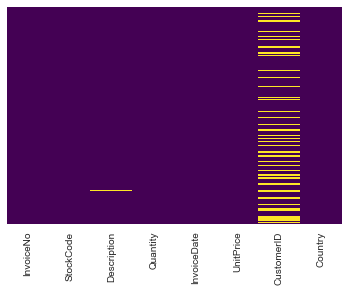

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
df[df['Description'].isnull()].count()['InvoiceNo']
# there are 1454 error values in description. What have they purchased??

1454

In [16]:
df[df['Description'].isnull()]
# It's all NaN

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
12606,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom
14160,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
15793,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
15799,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
15803,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
17389,581103,22689,NaN,4,2011-12-07 11:58:00,0.0,NaN,United Kingdom
17390,581102,21803,NaN,20,2011-12-07 11:57:00,0.0,NaN,United Kingdom
21333,580743,47591B,NaN,1,2011-12-06 09:30:00,0.0,NaN,United Kingdom
26495,580588,21808,NaN,5,2011-12-05 10:35:00,0.0,NaN,United Kingdom
26497,580580,21804,NaN,10,2011-12-05 10:33:00,0.0,NaN,United Kingdom


Investigating a little on NaN Description values by creating its own dataframe.

In [17]:
df_null_desc = df[df['Description'].isnull()]

In [18]:
df_null_desc['UnitPrice'].value_counts()

0.0    1454
Name: UnitPrice, dtype: int64

In [19]:
df_null_desc[df_null_desc['UnitPrice']==0]
## an important insight. The records where Desciption is NaN, UnitPrice is Zero. 
## Let me just once see what's under CustomerID for these rows. 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
12606,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom
14160,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
15793,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
15799,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
15803,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
17389,581103,22689,NaN,4,2011-12-07 11:58:00,0.0,NaN,United Kingdom
17390,581102,21803,NaN,20,2011-12-07 11:57:00,0.0,NaN,United Kingdom
21333,580743,47591B,NaN,1,2011-12-06 09:30:00,0.0,NaN,United Kingdom
26495,580588,21808,NaN,5,2011-12-05 10:35:00,0.0,NaN,United Kingdom
26497,580580,21804,NaN,10,2011-12-05 10:33:00,0.0,NaN,United Kingdom


In [20]:
df_null_desc['CustomerID'].unique()
# Another important insight that the CustomerID field for the NULL description records is also NULL. 
## May be I will drop all these rows. 
## There is no useful data in these records. The loss of records anyways is just 1454 out of 541909 records. Pretty OK with it.

array([ nan])

The records where description is null has:
    1. zero unit price value
    2. Null CustomerId
    
Thus, deleting these records which are providing no information.    

In [3]:
### Deleting the above rows mentioned
df_1 = df.dropna(subset=['Description'], how='all')
df_1.count()

InvoiceNo      540455
StockCode      540455
Description    540455
Quantity       540455
InvoiceDate    540455
UnitPrice      540455
CustomerID     406829
Country        540455
dtype: int64

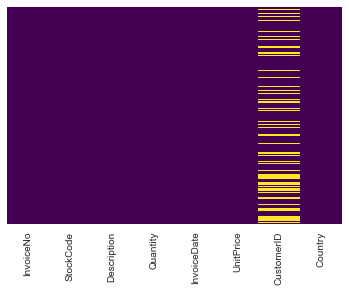

In [4]:
# Again visualizing the missing values.
sns.heatmap(df_1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### So the 'Description' problem is solved. We have now 540455 records and updated 'df_1'. 


### Next issue with the data is that we have lots of missing CustomerId values. For the Market Basket Analysis, we do not require CustomerId. 

In [4]:
df_1[df_1['CustomerID'].isnull()].count()['InvoiceNo']
# Damn, large missing values. 133,626 missing values in such an important variable "CustomerID".
# A probable reason for the null values might be that while purchasing, the customers did not use the Loyalty/Customer Card and 
# thus their identity is not recorded

133626

## Market Basket Analysis

In [4]:
df_1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,C581569,20979,36 PENCILS TUBE RED RETROSPOT,-5,2011-12-09 11:58:00,1.25,17315.0,United Kingdom
1,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom
2,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
3,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
4,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom


In [187]:
# Just curious about Manual, whether it's an error value or good one.
# It's a good one.
df_1[(df_1['Description']=='Manual') & (df_1['Quantity']>0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
12839,581405,M,Manual,3,2011-12-08 13:50:00,0.42,13521.0,United Kingdom
19633,580956,M,Manual,4,2011-12-06 14:23:00,1.25,17841.0,United Kingdom
20251,580884,M,Manual,1,2011-12-06 12:21:00,0.85,15907.0,United Kingdom
24957,580646,M,Manual,800,2011-12-05 13:13:00,0.25,17857.0,United Kingdom
24960,580645,M,Manual,1,2011-12-05 13:11:00,219.50,17857.0,United Kingdom
26080,580611,M,Manual,1,2011-12-05 11:49:00,0.85,12748.0,United Kingdom
33571,580054,M,Manual,8,2011-12-01 13:08:00,0.08,18122.0,United Kingdom
33905,580027,M,Manual,1,2011-12-01 12:01:00,10.00,14178.0,United Kingdom
36207,579711,M,Manual,1,2011-11-30 14:17:00,1.25,15060.0,United Kingdom
45824,578996,M,Manual,1,2011-11-27 16:02:00,1.00,13991.0,United Kingdom


### DataPrep I:  I will remove all the transactions that were cancelled and would work on purchased products for the Analysis.

In [5]:
df_2 = df_1[df_1['Quantity']>0]

In [5]:
df_2['InvoiceNo'].count()
# The dataset has 530,693 [half-million] records.

530693

### DataPrep II: Dealing with the "Adjusted Invoices"

In [6]:
df_2['InvoiceNo'] = df_2['InvoiceNo'].astype('str')

C:\Users\desai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
df_2[df_2['InvoiceNo'].str.contains('A')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9288,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom
9289,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
9290,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom


In [8]:
# Deleting the above columns which are not a part of purchase.
df_2.drop([9288,9289,9290], inplace=True)

C:\Users\desai\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Removing Bank charges

In [9]:
df_2[df_2['InvoiceNo'].str.contains('BANK')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [10]:
df_2.drop(df_2[df_2['InvoiceNo'].str.contains('BANK')].index, inplace=True)

C:\Users\desai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### DataPrep III: Removing the postages from the transactions

In [117]:
df_2[df_2['Description'].str.contains('POST')].index
# There are 1126 transactions which are not useful for the analysis.

Int64Index([], dtype='int64')

In [113]:
df_2.drop(df_2[df_2['Description'].str.contains('POST')].index, inplace=True)

C:\Users\desai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)

### DataPrep IV: Cleaning up "Description Column"

### i) There are records which are gifts given to customers. I will be removing those records

In [24]:
df_2[df_2['Description'].str.contains('gift')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [23]:
df_2[df_2['Description'].str.contains('gift')].index

Int64Index([], dtype='int64')

In [22]:
df_2.drop(df_2[df_2['Description'].str.contains('gift')].index, inplace=True)

C:\Users\desai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### ii) I have noticed that, the descriptions written in lower cases are not actual product purchases. These are internal remarks/comments made during the transactions.

In [29]:
# These are the records.
df_2[df_2['Description'].str.islower()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [28]:
# Obtaining the InvoicNo so that I can remove them for our data and clean it up.
df_2[df_2['Description'].str.islower()].index

Int64Index([], dtype='int64')

In [27]:
df_2.drop(df_2[df_2['Description'].str.islower()].index, inplace=True)

C:\Users\desai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### iii) Cleaning amazon fee

In [30]:
df_2[df_2['Description'].str.contains('AMAZON')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
31571,580145,22925,AMAZON,1,2011-12-02 10:03:00,0.00,NaN,United Kingdom
47077,578930,22848,AMAZON,1,2011-11-27 12:39:00,0.00,NaN,United Kingdom
50797,578700,72807A,AMAZON,1,2011-11-25 10:49:00,0.00,NaN,United Kingdom
408820,547901,AMAZONFEE,AMAZON FEE,1,2011-03-28 11:57:00,219.76,NaN,United Kingdom
527069,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom


In [31]:
df_2.drop(df_2[df_2['Description'].str.contains('AMAZON')].index, inplace=True)

C:\Users\desai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


How I am able to look for errors in Description column?
\n
A. 1. creating a group by 'Descriptions' with counts less than 10. 
   2. These are usually the errors

1. Adjustment
2. Amazon Adjustment
3. FOUND
4. Found
5. Found by jackie
6. Found in w/hse
7. Had been put aside.

There are few more like this but I am avoiding it currently as they would not affect much of the analysis


In [61]:
desc = pd.DataFrame(df_2.groupby('Description')['InvoiceNo'].count()<10)
desc[desc['InvoiceNo']==True]

,InvoiceNo
Description,
I LOVE LONDON MINI RUCKSACK,True
TOADSTOOL BEDSIDE LIGHT,True
*Boombox Ipod Classic,True
*USB Office Mirror Ball,True
15 PINK FLUFFY CHICKS IN BOX,True
16 PC CUTLERY SET PANTRY DESIGN,True
3 BIRDS CANVAS SCREEN,True
3 BLACK CATS W HEARTS BLANK CARD,True
3 PINK HEN+CHICKS IN BASKET,True


In [67]:
desc.to_csv('example')

In [97]:
df_2.to_csv('Zappos_Cleaned', index=False)

### For our Market Basket Analysis, we only require ['InvoiceNo', 'Description'] which are Cleaned and ready for analysis.

I will now group the products under the invoices.

In [26]:
df_2.groupby(['InvoiceNo','Description'])['Quantity'].count().sort_values()

InvoiceNo  Description                        
536365     CREAM CUPID HEARTS COAT HANGER          1
568070     VICTORIAN SEWING KIT                    1
           TRAVEL CARD WALLET VINTAGE TICKET       1
           TRAVEL CARD WALLET VINTAGE LEAF         1
           TRAVEL CARD WALLET KEEP CALM            1
           SILVER BELLS TABLE DECORATION           1
           SEWING SUSAN 21 NEEDLE SET              1
           SET OF 12 T-LIGHTS VINTAGE DOILEY       1
           SET 8 CANDLES VINTAGE DOILEY            1
           SET 6 SCHOOL MILK BOTTLES IN CRATE      1
           RUSTIC STRAWBERRY JAMPOT SMALL          1
           RUSTIC STRAWBERRY JAMPOT LARGE          1
           ROTATING SILVER ANGELS T-LIGHT HLDR     1
           PAPER CHAIN KIT 50'S CHRISTMAS          1
           MISTLETOE HEART WREATH GREEN            1
           LAVENDER TOILETTE BOTTLE                1
           JUMBO BAG VINTAGE CHRISTMAS             1
           HEART SHAPED HOLLY WREATH               1

Now, I would unstack all the invoices together against all the products (descriptions). The values indicate the quantities of product purchases (0 indicates not purchased).

### Note that I am currently doing analysis for FRANCE. I will try for different countries later.

In [32]:
mkt_bask_R_France = df_2[df_2['Country']=='France'][['InvoiceNo','Description']]
mkt_bask_R_France

,InvoiceNo,Description
9291,581587,BAKING SET 9 PIECE RETROSPOT
9292,581587,CHILDRENS APRON SPACEBOY DESIGN
9293,581587,PLASTERS IN TIN STRONGMAN
9294,581587,PLASTERS IN TIN CIRCUS PARADE
9295,581587,PACK OF 20 SPACEBOY NAPKINS
9296,581587,SPACEBOY LUNCH BOX
9297,581587,CIRCUS PARADE LUNCH BOX
9298,581587,ALARM CLOCK BAKELIKE GREEN
9299,581587,ALARM CLOCK BAKELIKE RED
9300,581587,ALARM CLOCK BAKELIKE PINK


In [35]:
mkt_bask_R_France[mkt_bask_R_France['Description']=='POSTAGE'].index

Int64Index([ 13686,  16338,  18178,  18404,  21123,  21227,  21396,  23635,
             23669,  26803,
            ...
            522115, 522191, 522329, 524814, 527823, 527933, 534106, 535327,
            536731, 541882],
           dtype='int64', length=300)

In [36]:
mkt_bask_R_France.drop(mkt_bask_R_France[mkt_bask_R_France['Description']=='POSTAGE'].index, inplace=True)

In [37]:
basket = df_2[df_2['Country'] =="France"].groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

In [38]:
basket.head()    

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


I will convert the quantity values with either:
    Purchased == 1 
    Not-Purchased == 0

In [44]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
basket_sets = basket.applymap(encode_units)

# applymap is used to do transformation by apply function to each element of the dataframe


In [46]:
# Also, I will be droppping the postabges purchased as they do not yield much of the information on purchasing trend.
basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [48]:
basket_sets.head()

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
basket_sets['DOORMAT HEARTS'].count()

392

### Thus, total transactions for the country of FRANCE for this store is 392.

Now, I would like to consider only the most frequent item sets out of 392. I will use the support metric setting it to 7%. The support for an item set means that:

The combination of purchased products (Item sets, e.g., [PaperNapkins, PaperCups, PaperPlates]) occurs atleast 7% [27/392].

In [27]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

In [28]:
frequent_itemsets.count()

support     51
itemsets    51
dtype: int64

In [29]:
frequent_itemsets

,support,itemsets
0,0.071429,[4 TRADITIONAL SPINNING TOPS]
1,0.096939,[ALARM CLOCK BAKELIKE GREEN]
2,0.102041,[ALARM CLOCK BAKELIKE PINK]
3,0.094388,[ALARM CLOCK BAKELIKE RED ]
4,0.081633,[BAKING SET 9 PIECE RETROSPOT ]
5,0.071429,[CHILDRENS CUTLERY DOLLY GIRL ]
6,0.099490,[DOLLY GIRL LUNCH BOX]
7,0.096939,[JUMBO BAG RED RETROSPOT]
8,0.076531,[JUMBO BAG WOODLAND ANIMALS]
9,0.125000,[LUNCH BAG APPLE DESIGN]


In [30]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [31]:
rules

,antecedants,consequents,support,confidence,lift
0,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.725000,7.478947
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.763158,7.478947
2,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.837838,8.642959
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.096939,0.815789,8.642959
4,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED ),0.102041,0.725000,7.681081
5,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE PINK),0.094388,0.783784,7.681081
6,(SPACEBOY LUNCH BOX ),(DOLLY GIRL LUNCH BOX),0.125000,0.571429,5.743590
7,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX ),0.099490,0.717949,5.743590
8,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN CIRCUS PARADE ),0.137755,0.648148,3.849607
9,(PLASTERS IN TIN CIRCUS PARADE ),(PLASTERS IN TIN SPACEBOY),0.168367,0.530303,3.849607


Filtering for interesting rules

In [33]:
rules[ (rules['lift'] >= 5) &
       (rules['confidence'] >= 0.75) ].sort_values('lift', ascending=False)

,antecedants,consequents,support,confidence,lift
2,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.837838,8.642959
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.096939,0.815789,8.642959
5,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE PINK),0.094388,0.783784,7.681081
23,(SET/6 RED SPOTTY PAPER PLATES),"(SET/20 RED RETROSPOT PAPER NAPKINS , SET/6 RE...",0.127551,0.780000,7.644000
22,"(SET/20 RED RETROSPOT PAPER NAPKINS , SET/6 RE...",(SET/6 RED SPOTTY PAPER PLATES),0.102041,0.975000,7.644000
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.763158,7.478947
20,"(SET/20 RED RETROSPOT PAPER NAPKINS , SET/6 RE...",(SET/6 RED SPOTTY PAPER CUPS),0.102041,0.975000,7.077778
18,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.888889,6.968889
19,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.960000,6.968889
21,"(SET/6 RED SPOTTY PAPER CUPS, SET/6 RED SPOTTY...",(SET/20 RED RETROSPOT PAPER NAPKINS ),0.122449,0.812500,6.125000


Just for a side note, I validated this result in R programming. The code is:

*basket<-read.csv('C:Python-for-Data-Analysis/Pandas/mkt_bask_france.csv')

head(basket)

trans <- as(split(basket[,"Description"], basket[,"InvoiceNo"]), "transactions")

inspect(trans)


trans2<- as (trans, "transactions")

inspect(trans2)


rules<- apriori(trans2, parameter = list(supp = 0.07, conf = 0.6))

options(digits=2)

inspect(rules[1:5])

rules<-sort(rules, by="lift", decreasing=TRUE)

inspect(rules[1:5])



The results (association rules) were exactly the same and thus the results are validated.

In [78]:
rules.iloc[25,0]

frozenset({'SET/6 RED SPOTTY PAPER PLATES'})

In [77]:
rules.iloc[25,1]

frozenset({'SET/20 RED RETROSPOT PAPER NAPKINS ',
           'SET/6 RED SPOTTY PAPER CUPS'})

### Observations:

* As we can see for rules in RuleID = 25 as well as few others, the trend of buying Paper plates, paper cups and paper napkins is quite often. And this is intuitive enough that people would tend to buy a whole set of disposable items.


* The support of [SpottyPaperPlates => (SpottyPaperCups, SpottyPaperNapkins)] is 12.75% [~50/392]. This shows that this combination of purchasing is done 50 times out of total 392 total invoices in France. 


* The Confidence in the rule, i.e., the probability of purchasing (Cups, Napkins) after a prior purchase of (Plates) made is 0.78.


* LIFT is the overall metric that summarizes all the metrics and provides a single number which indicates the importance of the rule. Mathematically speaking, it shows the Statistical Dependence/Independence of the item sets. A lift of 1 shows that the item sets are independent and buying antecedent (Plates) item does not affect in buying the consequent (Cups, Napkins) and the consequent purchase is just random. A lift greater than 1, shows statistical dependency and so purchase of antecedent aids in puchasing of consequent.  
 
 LIFT = [CONFIDENCE IN THE RULE] / [SUPPORT OF THE CONSEQUENT]
    

* Also there is some trend in buying different colors of alarm clocks. People of France tend to buy a set of alarm clocks of different colors. Most highly purchased colors are [Red, Green, Pink].


* Thus we can give a combo offer which would lead to further sales of clock. Also other colors might be combined for an offer and it seems that people would buy other colors too upon an offer. 


* Considering the RuleID: 2, 

    * [GreenClock => RedClock]
    * Support  = 9.69% [38/392]
    * Confidence (probability of buying Red once Green is purchased) = 0.81
    * Lift = 8.64

    

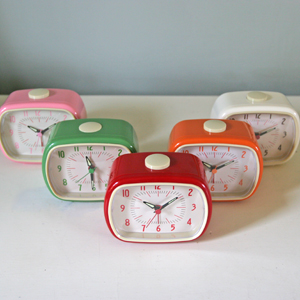

Let's see such interesting buying trends for other countries of interest. 

In [34]:
df_2['Country'].value_counts().head()

United Kingdom    485558
Germany             9042
France              8408
EIRE                7894
Spain               2485
Name: Country, dtype: int64

## Market Basket for United Kingdom

In [50]:
basket_uk = df_2[df_2['Country'] =="United Kingdom"].groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

In [51]:
basket_uk['I LOVE LONDON WALL ART'].count()

18058

In [52]:
basket_uk.head(5)

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY,incorrectly credited C550456 see 47
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### There are 18,058 trasactions recorded for the country of United Kingdom

In [54]:
basket_sets_uk = basket_uk.applymap(encode_units)
basket_sets_uk.drop('POSTAGE', inplace=True, axis=1)

Again, out of 18,058 transactions I will select only the interesting ones that qualify for further analysis.


* In this case of Uk, since we have a larger consumer data, I will take itemsets with a support of 3.0% [Purchased atleast 542 times in a total of 18,058 transactions.]

In [56]:
frequent_itemsets_uk = apriori(basket_sets_uk, min_support=0.03, use_colnames=True) 

In [57]:
frequent_itemsets_uk.count()

support     144
itemsets    144
dtype: int64

In [58]:
frequent_itemsets_uk.sort_values('support', ascending = False)

,support,itemsets
128,0.119947,[WHITE HANGING HEART T-LIGHT HOLDER]
55,0.107321,[JUMBO BAG RED RETROSPOT]
102,0.093310,[REGENCY CAKESTAND 3 TIER]
90,0.088271,[PARTY BUNTING]
73,0.077085,[LUNCH BAG RED RETROSPOT]
8,0.075922,[ASSORTED COLOUR BIRD ORNAMENT]
110,0.068723,[SET OF 3 CAKE TINS PANTRY DESIGN ]
80,0.067505,[NATURAL SLATE HEART CHALKBOARD ]
67,0.067339,[LUNCH BAG BLACK SKULL.]
37,0.064459,[HEART OF WICKER SMALL]


In [59]:
rules_uk = association_rules(frequent_itemsets_uk, metric="lift", min_threshold=1)

In [60]:
rules_uk.sort_values('lift', ascending=False)

,antecedants,consequents,support,confidence,lift
2,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.051722,0.617773,15.868770
3,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.038930,0.820768,15.868770
18,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.038930,0.776671,14.655311
19,(ROSES REGENCY TEACUP AND SAUCER ),(PINK REGENCY TEACUP AND SAUCER),0.052996,0.570533,14.655311
4,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.051722,0.750535,14.162139
5,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.052996,0.732497,14.162139
0,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.051501,0.605376,12.479322
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.048510,0.642694,12.479322
16,(LUNCH BAG RED RETROSPOT),(LUNCH BAG PINK POLKADOT),0.077085,0.397989,7.144012
17,(LUNCH BAG PINK POLKADOT),(LUNCH BAG RED RETROSPOT),0.055709,0.550696,7.144012


* So for United Kingdom, the data shows that there is again a trend of purchasing different colored teacup and saucers together. * This makes sense since people would like to buy a set of different colors of teacups. 
* Moreover, British people love tea, so I would recommend to pair the different colored teacups together and bundle them. 
* As we see in the above rules, consider the RuleID 2, the support is high of 5.1% [934 times purchased together]. Also other colored teacups have good support as well as confidence. So we can assume that bundling would do good.

I would like to change some parameter and see some more interesting rules. 

In [61]:
frequent_itemsets_uk_2 = apriori(basket_sets_uk, min_support=0.02, use_colnames=True) 

In [62]:
frequent_itemsets_uk_2.count()

support     396
itemsets    396
dtype: int64

In [63]:
rules_uk_2 = association_rules(frequent_itemsets_uk_2, metric="lift", min_threshold=1)

In [65]:
rules_uk_2.sort_values('lift', ascending=False)

,antecedants,consequents,support,confidence,lift
186,(WOODEN STAR CHRISTMAS SCANDINAVIAN),(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.026526,0.768267,27.256129
187,(WOODEN HEART CHRISTMAS SCANDINAVIAN),(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.028187,0.722986,27.256129
192,(PINK REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",0.038930,0.701280,18.065219
189,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.038819,0.703281,18.065219
190,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.030236,0.902930,17.457299
191,(GREEN REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",0.051722,0.527837,17.457299
193,(ROSES REGENCY TEACUP AND SAUCER ),"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",0.052996,0.515152,16.122368
188,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.031953,0.854419,16.122368
30,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.051722,0.617773,15.868770
31,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.038930,0.820768,15.868770


In [159]:
rules_uk_2.iloc[169]

antecedants      (RECIPE BOX PANTRY YELLOW DESIGN)
consequents    (SET OF 3 CAKE TINS PANTRY DESIGN )
support                                  0.0572046
confidence                                0.359148
lift                                       5.22602
Name: 169, dtype: object

* This is another insight from the data. We see the rule:
* [RECIPE BOX PANTRY YELLOW DESIGN] => [SET OF 3 CAKE TINS PANTRY DESIGN]
    * Support = 5.72% [1029 times purchased together]
    * Confidence = 0.35
    * Lift = 5.22 [Greater thn 1 shows statistically dependent in a positive way]

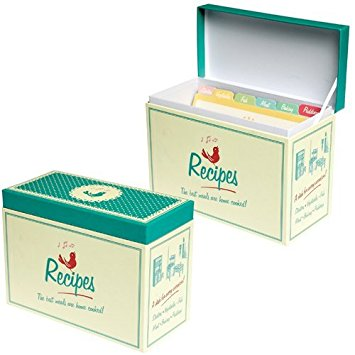, 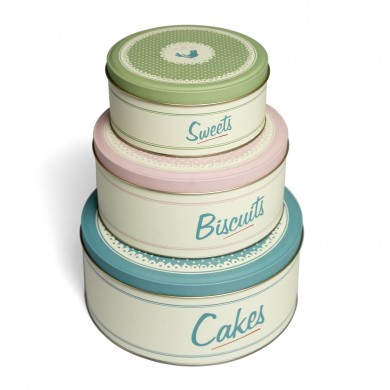

In [161]:
rules_uk_2.iloc[183]

antecedants     (WOODEN PICTURE FRAME WHITE FINISH)
consequents    (WHITE HANGING HEART T-LIGHT HOLDER)
support                                   0.0595858
confidence                                 0.375465
lift                                        3.13026
Name: 183, dtype: object

* Another insight from the data. We see the rule:
* [WOODEN PICTURE FRAME WHITE FINISH] => [WHITE HANGING HEART T-LIGHT HOLDER]
    * Support = 5.95% ~~ 6.0 % [1083 times purchased together]
    * Confidence = 0.37
    * Lift = 3.13 [Greater thn 1 shows statistically dependent in a positive way] 

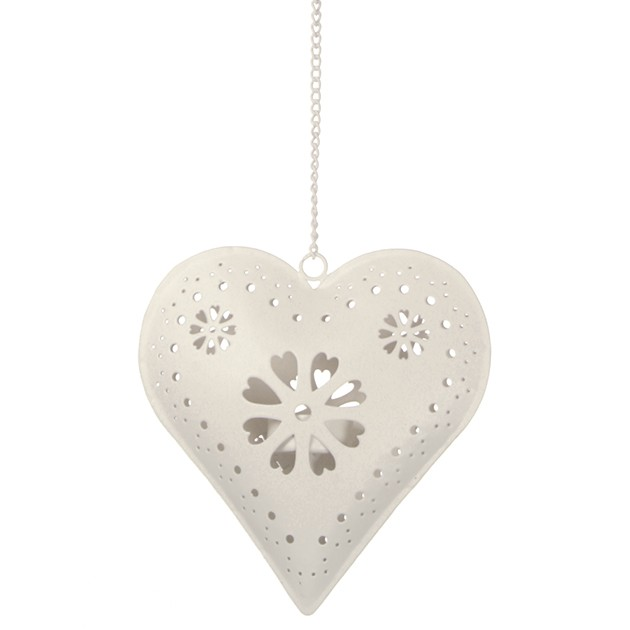, 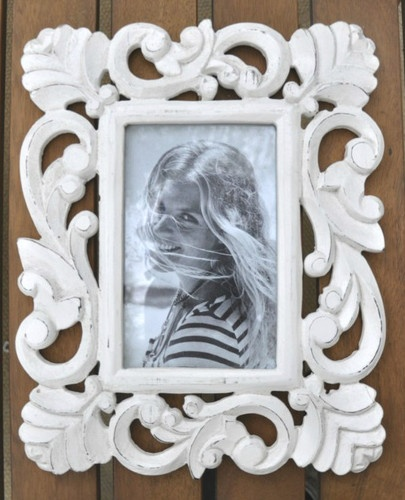

In [69]:
df_2.groupby('Country')['InvoiceNo'].count().sort_values(ascending=False)

Country
United Kingdom          485526
Germany                   9042
France                    8408
EIRE                      7894
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1967
Portugal                  1501
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Unspecified                446
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58


One final market basket analysis on EIRE (Ireland)

In [70]:
basket_ire = df_2[df_2['Country'] =="EIRE"].groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

In [75]:
basket_ire['SAVE THE PLANET MUG'].count()

288

There are total 288 invoices for the country of Ireland.

In [76]:
basket_sets_ire = basket_ire.applymap(encode_units)

In [96]:
frequent_itemsets_ire = apriori(basket_sets_ire, min_support=0.06, use_colnames=True) 

In [97]:
frequent_itemsets_ire.head()

,support,itemsets
0,0.083333,[60 TEATIME FAIRY CAKE CASES]
1,0.069444,[72 SWEETHEART FAIRY CAKE CASES]
2,0.069444,[ASSORTED COLOUR BIRD ORNAMENT]
3,0.104167,[BAKING SET 9 PIECE RETROSPOT ]
4,0.062500,[BINGO SET]


In [98]:
rules_ire = association_rules(frequent_itemsets_ire, metric="lift", min_threshold=1)

In [104]:
rules_ire.sort_values('lift', ascending=False)

,antecedants,consequents,support,confidence,lift
33,(REGENCY TEA PLATE GREEN ),(REGENCY TEA PLATE PINK),0.079861,0.782609,11.269565
32,(REGENCY TEA PLATE PINK),(REGENCY TEA PLATE GREEN ),0.069444,0.900000,11.269565
28,(REGENCY TEAPOT ROSES ),(REGENCY SUGAR BOWL GREEN),0.065972,0.947368,10.913684
29,(REGENCY SUGAR BOWL GREEN),(REGENCY TEAPOT ROSES ),0.086806,0.720000,10.913684
34,(REGENCY TEA PLATE GREEN ),(REGENCY TEA PLATE ROSES ),0.079861,0.869565,9.632107
35,(REGENCY TEA PLATE ROSES ),(REGENCY TEA PLATE GREEN ),0.090278,0.769231,9.632107
25,(REGENCY SUGAR BOWL GREEN),(REGENCY MILK JUG PINK ),0.086806,0.800000,9.216000
24,(REGENCY MILK JUG PINK ),(REGENCY SUGAR BOWL GREEN),0.086806,0.800000,9.216000
81,"(REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP...","(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",0.069444,0.950000,8.290909
80,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...","(REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP...",0.114583,0.575758,8.290909


In [102]:
rules_ire.to_csv('rules_ire', index=False)

In [101]:
rules_ire.count()

antecedants    88
consequents    88
support        88
confidence     88
lift           88
dtype: int64

Two rules that are found a little interesting are:
* TEAPOT => SUGAR BOWL
    * SUPPORT = 0.065 (19 invoices contained both the items out of 288)
    * CONFIDENCE = 0.947 (94.73% chances that once TEAPOT is purchased, customers also buy SUGAR BOWL)
    * LIFT = 10.91 (Much greater than 1 indicates that the two products are correlated in a positive way and statistically dependant)
    
    
    
* MILK JUG => SUGAR BOWL 
    * SUPPORT = 0.086 ( Almost 25 invoices contained both the items out of 288.
    * CONFIDENCE = 0.80 (80.00% chances that once MILK JUG is purchased, customers also buy SUGAR BOWL)
    * LIFT = 10.91 (Much greater than 1 indicates that the two products are correlated in a positive way and statistically dependant)

### For further analysis, I would be getting some more information from the time stamp variable

In [129]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527984 entries, 9291 to 541908
Data columns (total 8 columns):
InvoiceNo      527984 non-null object
StockCode      527984 non-null object
Description    527984 non-null object
Quantity       527984 non-null int64
InvoiceDate    527984 non-null datetime64[ns]
UnitPrice      527984 non-null float64
CustomerID     396245 non-null float64
Country        527984 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 56.3+ MB


In [132]:
df_2['InvoiceDate'].iloc[0]

Timestamp('2011-12-09 12:50:00')

In [154]:
print ('Day is', df_2['InvoiceDate'].iloc[0].day,', month is ',df_2['InvoiceDate'].iloc[0].month, 
       ', year is', df_2['InvoiceDate'].iloc[0].day,
       ', weekday is', df_2['InvoiceDate'].iloc[0].weekday(), ', hour is', df_2['InvoiceDate'].iloc[0].hour, )

Day is 9 , month is  12 , year is 9 , weekday is 4 , hour is 12


In [155]:
df_2['Month'] = df_2['InvoiceDate'].apply(lambda x: x.month)

C:\Users\desai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [162]:
df_2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month
9291,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,12
9292,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France,12
9293,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France,12
9294,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France,12
9295,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12


In [163]:
df_2['Year'] = df_2['InvoiceDate'].apply(lambda x: x.year)
df_2['Weekday'] = df_2['InvoiceDate'].apply(lambda x: x.weekday())
df_2['Hour_of_Purchase'] = df_2['InvoiceDate'].apply(lambda x: x.hour)

C:\Users\desai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\desai\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\desai\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

#### Transforming weekdays and month from integers to a more readable format.

In [172]:
df_2['Weekday']=df_2['Weekday'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
df_2['Month']=df_2['Month'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June', 7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})

C:\Users\desai\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### After getting some more features for our data, the final dataset is

In [177]:
df_2.head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Weekday,Hour_of_Purchase
9291,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,Dec,2011,Fri,12
9292,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France,Dec,2011,Fri,12
9293,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France,Dec,2011,Fri,12
9294,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France,Dec,2011,Fri,12
9295,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Dec,2011,Fri,12
9296,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,Dec,2011,Fri,12
9297,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,Dec,2011,Fri,12
9298,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680.0,France,Dec,2011,Fri,12
9299,581587,22727,ALARM CLOCK BAKELIKE RED,4,2011-12-09 12:50:00,3.75,12680.0,France,Dec,2011,Fri,12
9300,581587,22728,ALARM CLOCK BAKELIKE PINK,4,2011-12-09 12:50:00,3.75,12680.0,France,Dec,2011,Fri,12


### Summary (Countries)
* As we see from the below summary most of the purchasing is done in the UK, Germany, France and Ireland. I would analyze the data from those countries to understand our customers and their behavior better. 
* Moreover, I would also like to dig a bit for Spain and Netherlands to learn if we can target our customers to boost up sales.

In [183]:
df_2['Country'].value_counts().head(6)

United Kingdom    484113
Germany             8658
France              8102
EIRE                7880
Spain               2419
Netherlands         2324
Name: Country, dtype: int64

## This is while tracking the products that repeatd less than 10. Will deal later if required.

In [127]:
desc = pd.DataFrame(df_2.groupby('Description')['InvoiceNo'].count()<10)

In [145]:
desc[desc['InvoiceNo']==True]

,InvoiceNo
Description,
I LOVE LONDON MINI RUCKSACK,True
TOADSTOOL BEDSIDE LIGHT,True
*Boombox Ipod Classic,True
*USB Office Mirror Ball,True
15 PINK FLUFFY CHICKS IN BOX,True
16 PC CUTLERY SET PANTRY DESIGN,True
3 BIRDS CANVAS SCREEN,True
3 BLACK CATS W HEARTS BLANK CARD,True
3 PINK HEN+CHICKS IN BASKET,True


In [18]:
df_1_null_cust =  df_1[df_1['CustomerID'].isnull()]

In [113]:
grouped_df = df_1_null_cust.groupby( 'Description' )['InvoiceNo'].count()
    

In [114]:
grp = pd.DataFrame(grouped_df)

In [115]:
grp.reset_index(inplace=True)

In [118]:
grp.columns = ['Description','Counts']

In [ ]:
result = []
for df_1_null_cust['Description'] in a:
  if condition:
    result.append(item)
a = result

In [140]:
result = []
grp[grp['Counts']<10]['Description']

0                                     20713
1             4 PURPLE FLOCK DINNER CANDLES
5                   NINE DRAWER OFFICE TIDY
11                    *Boombox Ipod Classic
12                  *USB Office Mirror Ball
22                12 PENCILS TALL TUBE POSY
32        2 PICTURE BOOK EGGS EASTER CHICKS
33         2 PICTURE BOOK EGGS EASTER DUCKS
37                     20713 wrongly marked
52           3 WICK CHRISTMAS BRIAR CANDLE 
57                     36 PENCILS TUBE POSY
68       4 BLUE DINNER CANDLES SILVER FLOCK
69           4 BURGUNDY WINE DINNER CANDLES
70             4 GOLD FLOCK CHRISTMAS BALLS
75        4 PINK DINNER CANDLE SILVER FLOCK
82            5 HOOK HANGER MAGIC TOADSTOOL
84            5 STRAND GLASS NECKLACE AMBER
85         5 STRAND GLASS NECKLACE AMETHYST
86            5 STRAND GLASS NECKLACE BLACK
87          5 STRAND GLASS NECKLACE CRYSTAL
89          50CM METAL STRING WITH  7 CLIPS
104               75 BLACK PETIT FOUR CASES
108                         ? so

In [116]:
# this is another descriptive analysis, to be taken care of after removing the null values. 

df_1[df_1['Quantity']<0].count()
# so there are 10624 orders that have been cancelled.

InvoiceNo      9762
StockCode      9762
Description    9762
Quantity       9762
InvoiceDate    9762
UnitPrice      9762
CustomerID     8905
Country        9762
dtype: int64

## Extra reference material

## Reference Codes to be used in future

1. ecomm[ecomm['CC Exp Date'].apply(lambda x: x[3:]=='25')].head()     
                lambda functions

2. def chief_string(title):
    if 'chief' in title.lower():
        return True
    else:
        return False
        
    sum(sal['JobTitle'].apply(lambda x: chief_string(x)))
    
                finding characters in the features.
    
3. Refer matplotlib exercise for data visualization
4. df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)    
        time data extractions, refer 911 data set for other mapping                                                                     reference codes
        
5. df[df['Avg. Area House Age'].max() == df['Avg. Area House Age']]
                looking at the minimum or max row.
                
6. sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
            most important code to visualize the missing values
            
            
7. def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age            
               
               imputation of missing values

In [121]:
fig = plt.figure()

In [125]:
ax = fig.add_axes([0.8,0.8,1,1])

In [130]:
x = df_1['Quantity']
y = df_1['UnitPrice']
ax.plot(x, y)

In [139]:
df_1['Country'].value_counts()

United Kingdom          494024
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [159]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      540455 non-null object
StockCode      540455 non-null object
Description    540455 non-null object
Quantity       540455 non-null int64
InvoiceDate    540455 non-null datetime64[ns]
UnitPrice      540455 non-null float64
CustomerID     406829 non-null float64
Country        540455 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 57.1+ MB


In [161]:
df_1.describe()

,Quantity,UnitPrice,CustomerID
count,540455.000000,540455.000000,406829.000000
mean,9.603129,4.623519,15287.690570
std,218.007598,96.889628,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000
